In [178]:
import os
import time
import pandas as pd
from pandas import ExcelWriter
import pickle
import imblearn
import numpy as np
import sklearn
import copy
from pandasql import *
from pandasql import sqldf
from mlens.visualization import corrmat
sql = lambda q: sqldf(q, globals()) 

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy import interp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, f1_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score, make_scorer

from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.float_format', lambda x: '%.f' %x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)  
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,8

print('This file is located in the following directory: \n'+os.getcwd())

This file is located in the following directory: 
/Users/Work/Desktop/Work/Projects/Kaggle/House Prices-Advanced Regression Techniques 


In [27]:
df = pd.read_csv('/Users/Work/Desktop/Work/Projects/Kaggle/House Prices-Advanced Regression Techniques /train.csv')
df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


# Examining and Cleaning the Data Prior to EDA 
(which is for assessing model predictability)

### Dealing with Null Values

Nulls can either be kept if they have predictive power, median/mean imputed, predicted via a method like Random Forests, or the column can be removed
Inspect Nulls, Drop High % Nulls, Drop Id



In [11]:
nulls=pd.DataFrame(df.isnull().sum(),columns=['Nulls'])
nulls=nulls[nulls.Nulls>0]
len(nulls)
temp=nulls/len(df)
temp.sort_values(by='Nulls',ascending=False)[:8].transpose()
nulls.sort_values(by='Nulls',ascending=False)[:8].transpose()

19

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt
Nulls,0.995,0.963,0.938,0.808,0.473,0.177,0.055,0.055


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt
Nulls,1453,1406,1369,1179,690,259,81,81


### Subsetting out Each Variable Type

In [64]:
#outcome excluded
df2=df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'],axis=1) #remove cols w >40% nulls

df2_numeric=df2[[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal']]

df2_discrete=df2[[
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars']]

df2_nominal=df2[[
'MSSubClass',
'MSZoning',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Heating',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Electrical',
'Functional',
'GarageType',
'GarageFinish',
'PavedDrive',
'SaleType',
'SaleCondition',
'BsmtFinType2',
'BsmtFinType1',
'Street',
'CentralAir'
]]

df2_ordinal=df[[
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'HeatingQC',
'KitchenQual',
'GarageQual',
'GarageCond',
'OverallQual',
'OverallCond',
'ExterQual',
'ExterCond'    
]]

df2_date=df[[
'YearBuilt',
'YearRemodAdd',
'GarageYrBlt',
'MoSold',
'YrSold'
]]

df2_ordinal=df2_ordinal.apply(lambda x: x.astype('str'))

### Checking the Data for Reasonability

/Users/Work/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


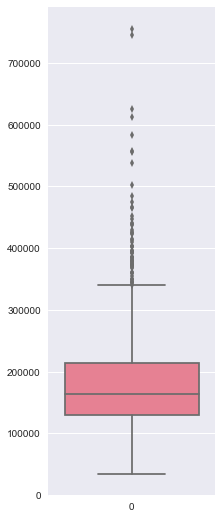

In [15]:
#df2['SalePrice'].plot(kind='box')
fig, axes = plt.subplots(1,1,figsize=(3,9))
sns.boxplot(data=df2['SalePrice'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e045e90>,
      dtype=object)

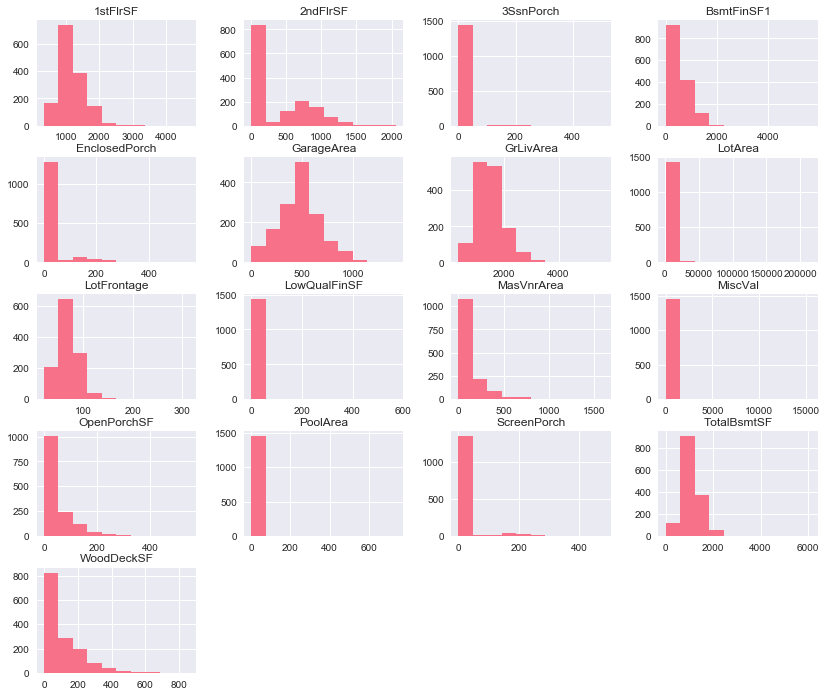

In [16]:
df2_numeric.hist(figsize=(14,12))

LotFrontage         Axes(0.125,0.749828;0.168478x0.130172)
LotArea          Axes(0.327174,0.749828;0.168478x0.130172)
MasVnrArea       Axes(0.529348,0.749828;0.168478x0.130172)
BsmtFinSF1       Axes(0.731522,0.749828;0.168478x0.130172)
TotalBsmtSF         Axes(0.125,0.593621;0.168478x0.130172)
1stFlrSF         Axes(0.327174,0.593621;0.168478x0.130172)
2ndFlrSF         Axes(0.529348,0.593621;0.168478x0.130172)
LowQualFinSF     Axes(0.731522,0.593621;0.168478x0.130172)
GrLivArea           Axes(0.125,0.437414;0.168478x0.130172)
GarageArea       Axes(0.327174,0.437414;0.168478x0.130172)
WoodDeckSF       Axes(0.529348,0.437414;0.168478x0.130172)
OpenPorchSF      Axes(0.731522,0.437414;0.168478x0.130172)
EnclosedPorch       Axes(0.125,0.281207;0.168478x0.130172)
3SsnPorch        Axes(0.327174,0.281207;0.168478x0.130172)
ScreenPorch      Axes(0.529348,0.281207;0.168478x0.130172)
PoolArea         Axes(0.731522,0.281207;0.168478x0.130172)
MiscVal                Axes(0.125,0.125;0.168478x0.13017

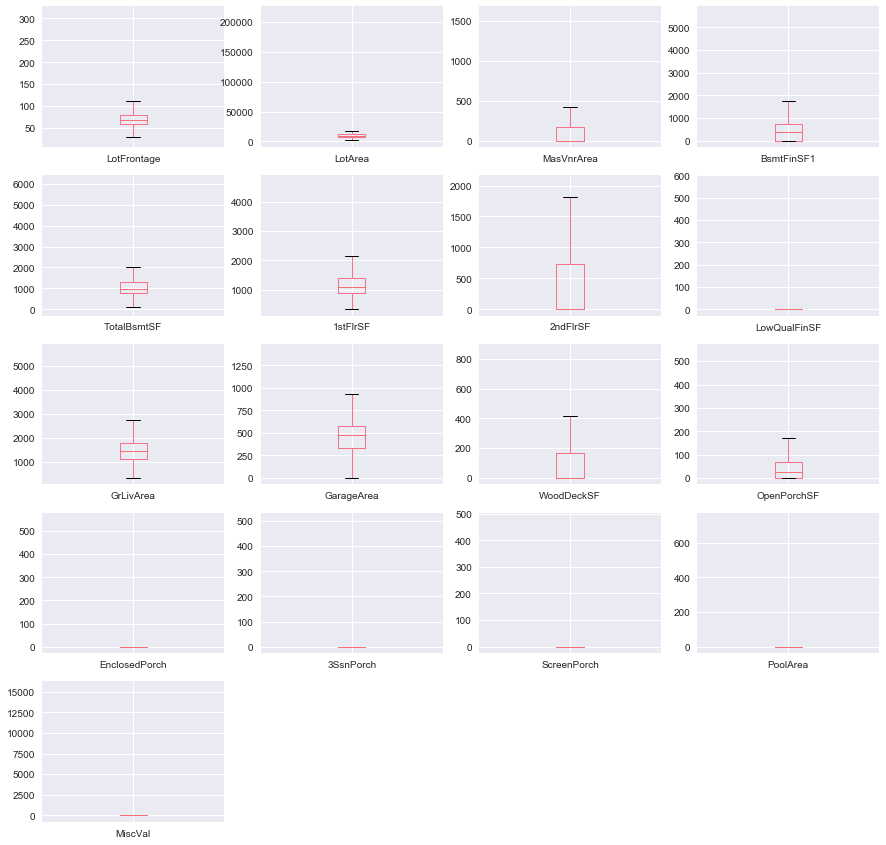

In [17]:
df2_numeric.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False,figsize=(15,15))

Inspecting the below:

1. There are no negative values in the numerics, which makes sense. 
2. 1stFlrSF (square footage of 1st floor) has a min greater than zero which makes sense.
3. 2sndFlrSF (square footage of 2nd floor) has a min of zero indicating some placees do not have second floors, which makes sense.



In [18]:
df2_numeric.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,70.050,10516.828,103.685,443.640,1057.429,1162.627,346.992,5.845,1515.464,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489
std,24.285,9981.265,181.066,456.098,438.705,386.588,436.528,48.623,525.480,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123
min,21.000,1300.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,59.000,7553.500,0.000,0.000,795.750,882.000,0.000,0.000,1129.500,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,69.000,9478.500,0.000,383.500,991.500,1087.000,0.000,0.000,1464.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000
75%,80.000,11601.500,166.000,712.250,1298.250,1391.250,728.000,0.000,1776.750,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000
max,313.000,215245.000,1600.000,5644.000,6110.000,4692.000,2065.000,572.000,5642.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000


### Label Encode the Ordinal Data

In [117]:
df2_ordinal_encoded=copy.deepcopy(df2_ordinal)

def label_encode(col):
    if col =='Ex':
        return 5
    elif col=='Gd':
        return 4
    elif col=='TA':
        return 3
    elif col=='Fa':
        return 2
    elif col=='Po':
        return 1
    elif col=='NA':
        return 0
    elif col=='nan':
        return 'nan'
    else: 
        return 'WHAT HAPPENED?'

def bsmtexposure_encode(col):
    if col=='Gd':
        return 4
    elif col=='Av':
        return 3
    elif col=='Mn':
        return 2
    elif col=='No':
        return 1
    elif col=='NA':
        return 0
    elif col=='nan':
        return 'nan'
    else: 
        return 'WHAT HAPPENED?'
    
for j in range(len(df2_ordinal_encoded.columns)):
    if df2_ordinal_encoded.columns[j] in ['OverallQual', 'OverallCond']:
        df2_ordinal_encoded.iloc[:,j]=df2_ordinal.iloc[:,j]
    elif df2_ordinal_encoded.columns[j] !='BsmtExposure':
        df2_ordinal_encoded.iloc[:,j]=df2_ordinal.iloc[:,j].apply(label_encode) 
    elif df2_ordinal_encoded.columns[j] =='BsmtExposure':
        df2_ordinal_encoded.iloc[:,j]=df2_ordinal.iloc[:,j].apply(bsmtexposure_encode)

In [118]:
df2_ordinal_encoded2.dtypes

BsmtQual        float64
BsmtCond        float64
BsmtExposure    float64
HeatingQC         int64
KitchenQual       int64
GarageQual      float64
GarageCond      float64
OverallQual      object
OverallCond      object
ExterQual         int64
ExterCond         int64
dtype: object

In [111]:
df2_ordinal_encoded2["OverallCond"].astype('int64')

0       5
1       8
2       5
3       5
4       5
5       5
6       5
7       6
8       5
9       6
10      5
11      5
12      6
13      5
14      5
15      8
16      7
17      5
18      5
19      6
20      5
21      7
22      5
23      7
24      8
25      5
26      7
27      5
28      6
29      6
       ..
1430    5
1431    6
1432    6
1433    5
1434    5
1435    9
1436    6
1437    5
1438    7
1439    6
1440    7
1441    5
1442    5
1443    6
1444    5
1445    5
1446    7
1447    5
1448    7
1449    7
1450    5
1451    5
1452    5
1453    5
1454    5
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64

In [105]:
df2_numeric_ordinal_encoded_outcome['BsmtExposure'].value_counts()

1.000    953
3.000    221
4.000    134
2.000    114
Name: BsmtExposure, dtype: int64

In [98]:
#df2_ordinal_encoded.dtypes
df2_numeric_ordinal_encoded_outcome.dtypes

SalePrice          int64
LotFrontage      float64
LotArea            int64
MasVnrArea       float64
BsmtFinSF1         int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
HeatingQC          int64
KitchenQual        int64
GarageQual       float64
GarageCond       float64
OverallQual       object
OverallCond       object
ExterQual          int64
ExterCond          int64
dtype: object

As shown below, ordinals with nans that thus need to be median imputed: <br>
BsmtQual, BsmtCond, BsmtExposure, GarageQual, FireplaceQu, GarageCond, PoolQC

In [38]:
#Checking encoded variable values
for j in range(len(df2_ordinal_encoded.columns)):
    df2_ordinal_encoded.iloc[:,j].value_counts()

3      649
4      618
5      121
nan     37
2       35
Name: BsmtQual, dtype: int64

3      1311
4        65
2        45
nan      37
1         2
Name: BsmtCond, dtype: int64

1      953
3      221
4      134
2      114
nan     38
Name: BsmtExposure, dtype: int64

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

3      1311
nan      81
2        48
4        14
5         3
1         3
Name: GarageQual, dtype: int64

3      1326
nan      81
2        35
4         9
1         7
5         2
Name: GarageCond, dtype: int64

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

# Exploratory Data Analysis

Below, observe that

1.  9 numeric/ordinal predictors are at least moderately correlated with the outcome (>|.5|)
2.  2 of these predictors are strongly, positively correlated (>|.7|)

### Numeric and Ordinal (treated as numeric) Correlations

Pandas corr() method needs non-object datatypes (float64 or int64(.  I replace the variables with 'nan' strings to have np.Nan's, which automatically converts them float64.  Vars without nan's are still not converted, however (OverallQual and OverallCond), so I then convert them using the .astype() method.

In [135]:
df2_ordinal_encoded2=df2_ordinal_encoded.replace('nan',np.nan)  #convert vars to float
df2_ordinal_encoded2=df2_ordinal_encoded2.astype('float64')  #convert vars to float

df2_numeric_ordinal_encoded_outcome=pd.concat([df2['SalePrice'],df2_numeric,df2_ordinal_encoded2],axis=1)
df2_discrete_outcome=pd.concat([df2['SalePrice'],df2_discrete],axis=1)

In [136]:
df2_discrete_outcome.corr(method='spearman')['SalePrice'].sort_values(ascending=False).drop(['SalePrice'])

GarageCars      0.691
FullBath        0.636
TotRmsAbvGrd    0.533
Fireplaces      0.519
HalfBath        0.343
BedroomAbvGr    0.235
BsmtFullBath    0.225
BsmtHalfBath   -0.012
KitchenAbvGr   -0.165
Name: SalePrice, dtype: float64

In [137]:
df2_numeric_ordinal_encoded_outcome.corr(method='spearman')['SalePrice'].sort_values(ascending=False).drop(['SalePrice'])

OverallQual      0.810
GrLivArea        0.731
ExterQual        0.684
KitchenQual      0.673
BsmtQual         0.664
GarageArea       0.649
TotalBsmtSF      0.603
1stFlrSF         0.575
HeatingQC        0.491
OpenPorchSF      0.478
LotArea          0.456
MasVnrArea       0.421
LotFrontage      0.409
WoodDeckSF       0.354
BsmtExposure     0.305
BsmtFinSF1       0.302
2ndFlrSF         0.294
GarageQual       0.197
BsmtCond         0.196
GarageCond       0.171
ScreenPorch      0.100
3SsnPorch        0.065
PoolArea         0.058
ExterCond        0.012
MiscVal         -0.063
LowQualFinSF    -0.068
OverallCond     -0.129
EnclosedPorch   -0.218
Name: SalePrice, dtype: float64

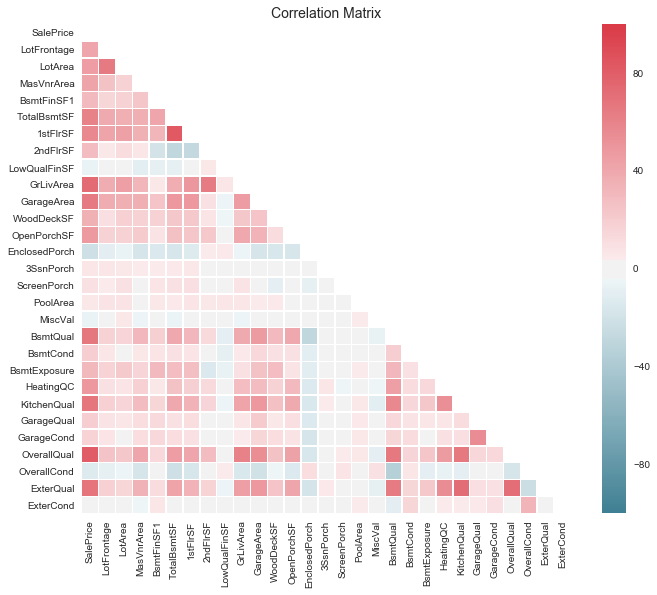

In [134]:
sns.set(style="white") #this whites out the upper-right section of the matrix
corrmat(df2_numeric_ordinal_encoded_outcome.corr(method='spearman'),annotate=False)
#set annotate = True to show correlation values

### Nominal "Correlations"

In [139]:
df2_nominal_outcome=pd.concat([df2['SalePrice'],df2_nominal,],axis=1)
for j in df2_nominal.columns:
    df2_nominal_outcome.groupby(j).SalePrice.mean()

MSSubClass
20    185224.812
30     95829.725
40    156125.000
45    108591.667
50    143302.972
60    239948.502
70    166772.417
75    192437.500
80    169736.552
85    147810.000
90    133541.077
120   200779.080
160   138647.381
180   102300.000
190   129613.333
Name: SalePrice, dtype: float64

MSZoning
C (all)    74528.000
FV        214014.062
RH        131558.375
RL        191004.995
RM        126316.830
Name: SalePrice, dtype: float64

LotShape
IR1   206101.665
IR2   239833.366
IR3   216036.500
Reg   164754.818
Name: SalePrice, dtype: float64

LandContour
Bnk   143104.079
HLS   231533.940
Low   203661.111
Lvl   180183.747
Name: SalePrice, dtype: float64

Utilities
AllPub   180950.957
NoSeWa   137500.000
Name: SalePrice, dtype: float64

LotConfig
Corner    181623.426
CulDSac   223854.617
FR2       177934.574
FR3       208475.000
Inside    176938.048
Name: SalePrice, dtype: float64

LandSlope
Gtl   179956.800
Mod   196734.138
Sev   204379.231
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn   194870.882
Blueste   137500.000
BrDale    104493.750
BrkSide   124834.052
ClearCr   212565.429
CollgCr   197965.773
Crawfor   210624.725
Edwards   128219.700
Gilbert   192854.506
IDOTRR    100123.784
MeadowV    98576.471
Mitchel   156270.122
NAmes     145847.080
NPkVill   142694.444
NWAmes    189050.068
NoRidge   335295.317
NridgHt   316270.623
OldTown   128225.301
SWISU     142591.360
Sawyer    136793.135
SawyerW   186555.797
Somerst   225379.837
StoneBr   310499.000
Timber    242247.447
Veenker   238772.727
Name: SalePrice, dtype: float64

Condition1
Artery   135091.667
Feedr    142475.481
Norm     184495.492
PosA     225875.000
PosN     215184.211
RRAe     138400.000
RRAn     184396.615
RRNe     190750.000
RRNn     212400.000
Name: SalePrice, dtype: float64

Condition2
Artery   106500.000
Feedr    121166.667
Norm     181169.406
PosA     325000.000
PosN     284875.000
RRAe     190000.000
RRAn     136905.000
RRNn      96750.000
Name: SalePrice, dtype: float64

BldgType
1Fam     185763.807
2fmCon   128432.258
Duplex   133541.077
Twnhs    135911.628
TwnhsE   181959.342
Name: SalePrice, dtype: float64

HouseStyle
1.5Fin   143116.740
1.5Unf   110150.000
1Story   175985.478
2.5Fin   220000.000
2.5Unf   157354.545
2Story   210051.764
SFoyer   135074.486
SLvl     166703.385
Name: SalePrice, dtype: float64

RoofStyle
Flat      194690.000
Gable     171483.956
Gambrel   148909.091
Hip       218876.934
Mansard   180568.429
Shed      225000.000
Name: SalePrice, dtype: float64

RoofMatl
ClyTile   160000.000
CompShg   179803.679
Membran   241500.000
Metal     180000.000
Roll      137000.000
Tar&Grv   185406.364
WdShake   241400.000
WdShngl   390250.000
Name: SalePrice, dtype: float64

Heating
Floor    72500.000
GasA    182021.195
GasW    166632.167
Grav     75271.429
OthW    125750.000
Wall     92100.000
Name: SalePrice, dtype: float64

Exterior1st
AsbShng   107385.550
AsphShn   100000.000
BrkComm    71000.000
BrkFace   194573.000
CBlock    105000.000
CemntBd   231690.656
HdBoard   163077.450
ImStucc   262000.000
MetalSd   149422.177
Plywood   175942.380
Stone     258500.000
Stucco    162990.000
VinylSd   213732.901
Wd Sdng   149841.646
WdShing   150655.077
Name: SalePrice, dtype: float64

Exterior2nd
AsbShng   114060.550
AsphShn   138000.000
Brk Cmn   126714.286
BrkFace   195818.000
CBlock    105000.000
CmentBd   230093.833
HdBoard   167661.565
ImStucc   252070.000
MetalSd   149803.173
Other     319000.000
Plywood   168112.387
Stone     158224.800
Stucco    155905.154
VinylSd   214432.460
Wd Sdng   148386.066
Wd Shng   161328.947
Name: SalePrice, dtype: float64

MasVnrType
BrkCmn    146318.067
BrkFace   204691.872
None      156221.891
Stone     265583.625
Name: SalePrice, dtype: float64

Foundation
BrkTil   132291.075
CBlock   149805.715
PConc    225230.442
Slab     107365.625
Stone    165959.167
Wood     185666.667
Name: SalePrice, dtype: float64

Electrical
FuseA   122196.894
FuseF   107675.444
FuseP    97333.333
Mix      67000.000
SBrkr   186825.113
Name: SalePrice, dtype: float64

Functional
Maj1   153948.143
Maj2    85800.000
Min1   146385.484
Min2   144240.647
Mod    168393.333
Sev    129000.000
Typ    183429.147
Name: SalePrice, dtype: float64

GarageType
2Types    151283.333
Attchd    202892.656
Basment   160570.684
BuiltIn   254751.739
CarPort   109962.111
Detchd    134091.163
Name: SalePrice, dtype: float64

GarageFinish
Fin   240052.690
RFn   202068.870
Unf   142156.423
Name: SalePrice, dtype: float64

PavedDrive
N   115039.122
P   132330.000
Y   186433.974
Name: SalePrice, dtype: float64

SaleType
COD     143973.256
CWD     210600.000
Con     269600.000
ConLD   138780.889
ConLI   200390.000
ConLw   143700.000
New     274945.418
Oth     119850.000
WD      173401.837
Name: SalePrice, dtype: float64

SaleCondition
Abnorml   146526.624
AdjLand   104125.000
Alloca    167377.417
Family    149600.000
Normal    175202.220
Partial   272291.752
Name: SalePrice, dtype: float64

BsmtFinType2
ALQ   209942.105
BLQ   151101.000
GLQ   180982.143
LwQ   164364.130
Rec   164917.130
Unf   184694.690
Name: SalePrice, dtype: float64

BsmtFinType1
ALQ   161573.068
BLQ   149493.655
GLQ   235413.720
LwQ   151852.703
Rec   146889.248
Unf   170670.577
Name: SalePrice, dtype: float64

Street
Grvl   130190.500
Pave   181130.539
Name: SalePrice, dtype: float64

CentralAir
N   105264.074
Y   186186.710
Name: SalePrice, dtype: float64

### Checking Numerical Predictor Distributions for Normality

6 Predictors with right-skewed distributions, so I will scale predictors: <br>
WoodDeckSF, 2ndFlrSF, BsmtFinSF1, GrLivArea, LotFrontage, OpenPorchSF, 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e51110>,
      dtype=object)

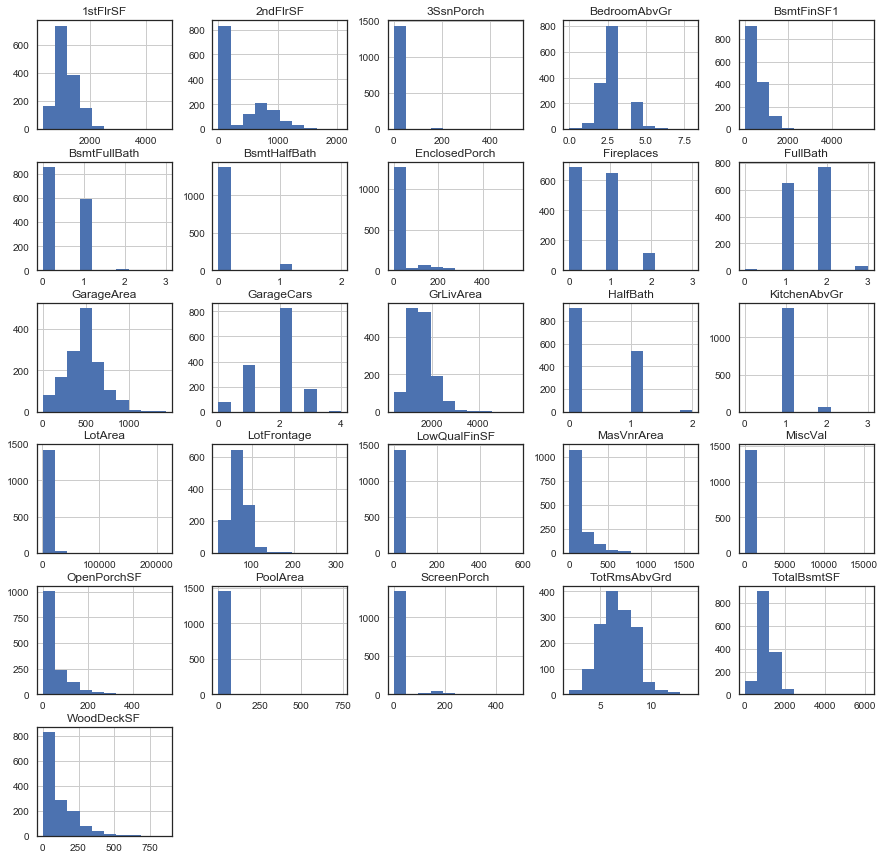

In [141]:
pd.concat([df2_numeric,df2_discrete],axis=1).hist(figsize=(15,15))

# Data Preparation after EDA

### One-Hot Encode the Nominal Data

5 dummies account for 71 out of the 185 dummies, which is greatly increasing the data's dimensionality. I am hesitant to simply remove them at this point, since the the average Sale Price tends to vary greatly across each of these dummies' levels (90k - >200k).  <br>

Unique nominal predictor counts are shown below, so one-hot encoding them will result in much greater data dimensionality.

In [142]:
for j in df2_nominal:
    print("%15r  %r" %(j,df2_nominal[j].nunique()))

   'MSSubClass'  15
     'MSZoning'  5
     'LotShape'  4
  'LandContour'  4
    'Utilities'  2
    'LotConfig'  5
    'LandSlope'  3
 'Neighborhood'  25
   'Condition1'  9
   'Condition2'  8
     'BldgType'  5
   'HouseStyle'  8
    'RoofStyle'  6
     'RoofMatl'  8
      'Heating'  6
  'Exterior1st'  15
  'Exterior2nd'  16
   'MasVnrType'  4
   'Foundation'  6
   'Electrical'  5
   'Functional'  7
   'GarageType'  6
 'GarageFinish'  3
   'PavedDrive'  3
     'SaleType'  9
'SaleCondition'  6
 'BsmtFinType2'  6
 'BsmtFinType1'  6
       'Street'  2
   'CentralAir'  2


In [143]:
df2_nominal=df2_nominal.apply(lambda x: x.astype('str')) #MSSubClass has #s as values and get_dummies would not one-hot encode it
df2_nominal_encoded=pd.get_dummies(df2_nominal,drop_first=True) #drop_first to prevent dummy variable trap
len(df2_nominal_encoded.columns)

185

### Handling Missing Values

1) Nominals, keep nan as its own column <br>
2) Ordinals/Numerics/dates, median impute nan <br>

Below, I look at NaN's for each variable.

In [151]:
print('Ordinal NaNs')
df2_ordinal_encoded2.isnull().sum().sort_values(ascending=False)[:6] #5 ordinal NaNs
print('Numeric NaNs')
df2_numeric.isnull().sum().sort_values(ascending=False)[:3] # 2 numeric NaNs
print('Nominal NaNs')
df2_nominal_encoded.isnull().sum()[:3] #Nominal nan's were given their own columns with 1 indicating NaN
print('Discrete NaNs')
df2_discrete.isnull().sum() #no discrete NaN's
print('Date NaNs')
df2_date.isnull().sum() #81 date NaN's

Ordinal NaNs


GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtCond        37
BsmtQual        37
ExterCond        0
dtype: int64

Numeric NaNs


LotFrontage     259
MasVnrArea        8
LowQualFinSF      0
dtype: int64

Nominal NaNs


MSSubClass_160    0
MSSubClass_180    0
MSSubClass_190    0
dtype: int64

Discrete NaNs


BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
dtype: int64

Date NaNs


YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MoSold           0
YrSold           0
dtype: int64

### Create the Combined Dataframe

In [240]:
df3=pd.concat([df2_numeric, df2_discrete, df2_nominal_encoded, df2_ordinal_encoded2, df2_date, df2['SalePrice']], axis=1)

In [158]:
df3_nulls=pd.DataFrame(df3.isnull().sum(),columns=['Nulls'])
df3_nulls=df3_nulls[df3_nulls.Nulls>0]
df3_nulls.transpose()

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,GarageQual,GarageCond,GarageYrBlt
Nulls,259,8,37,37,38,81,81,81


# Model Building - The Holdout Method with GridSearchCV

GridSearchCV hyperparameter tunes the method on the train split using 3-fold cv, by default.  It sends each combination of specified hyperparameter values into the method, 3 times, averages the resulting model evaluation metric (rmse), and selects the values with the highest average evaluation metric.

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#Uncommenting the above would yield a train, validation, and test split

def rmse(Y_test,Y_pred):   
    return np.sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred))

In [323]:
clf_dt  = DecisionTreeRegressor(random_state=0)
clf_knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1) 
clf_rf  = RandomForestRegressor(warm_start=True, oob_score=True,random_state=0,n_estimators=300)
clf_svm = svm.SVR()
clf_ada = AdaBoostRegressor(base_estimator=base, n_estimators = 100, random_state=0)
clf_gb  = GradientBoostingRegressor(random_state=0, max_features='sqrt')

clf_parameters = [ {"max_depth":[2,3,4,5]} , 
                   {"n_neighbors": [3,4,5,6,7]} ,
                   {"max_features": ['sqrt',.2,.5,.8]} ,
                   {'C': [.001, .01, .1, 1, 10], "gamma": [.001, .01, .1, 1]} ,
                   {'learning_rate': [.01,.1,1,2]} ,
                   {"learning_rate": [.001,.01,.1], "max_depth":[3,4,5]} ]

clf_names=['Decision Tree','K-Nearest Neighbors','Random Forests',
'Support Vector Machines','AdaBoost', 'Gradient Boosting']
clf_methods=[clf_dt, clf_knn, clf_rf, clf_svm, clf_ada, clf_gb]
clf_rmse=[0,0,0,0,0,0]

for j in range(len(clf_names)):
    print('\n')
    print(clf_names[j])
    start_time = time.time()
    fitmodel = GridSearchCV(clf_methods[j], param_grid=clf_parameters[j], cv=5, scoring="neg_mean_squared_error")
    fitmodel.fit(X_train, y_train)
    y_pred = fitmodel.predict(X_test)
    clf_rmse[j] =  rmse(y_test,y_pred)
    print(rmse(y_test,y_pred))
    print time.time() - start_time, 's'



Decision Tree


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

39255.62599511131
0.349329948425 s


K-Nearest Neighbors


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

49526.3062739517
3.0916390419 s


Random Forests


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 0.2, 0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

28300.769137035673
78.1822068691 s


Support Vector Machines


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

85142.11989091827
61.2967648506 s


AdaBoost


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.1, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

59752.7591456196
9.77028512955 s


Gradient Boosting


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

27337.569954724837
6.2824280262 s


## Inspecting Linear Regression Results

In [322]:
clf_lr  = LinearRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
rmse(y_test,y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

51832.63885326473

In [325]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('y_train ~ X_train', X_train).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     52.60
Date:                Sun, 02 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:00:28   Log-Likelihood:                -13307.
No. Observations:                1168   AIC:                         2.706e+04
Df Residuals:                     947   BIC:                         2.818e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.673e+06   1.24e+06     -1.349   

In [265]:
sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X=df3_temp.drop('SalePrice',axis=1)
y=df['SalePrice']
fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=1) #median imputer
X = pd.DataFrame(fill_NaN.fit_transform(X)) #median imputer

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
scores = cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
print("Folds: " + str(len(scores)) + ", RMSE: " + str(np.sqrt(np.mean(np.abs(scores)))))

KFold(n_splits=3, random_state=None, shuffle=False)

Folds: 10, RMSE: 45001.37976962872


### KFold with Rescaling yields a horrible result

In [262]:
X=df3_temp.drop('SalePrice',axis=1)
y=df['SalePrice']
fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=1) #median imputer
X2 = pd.DataFrame(fill_NaN.fit_transform(X)) #median imputer
scaler=MinMaxScaler() #default range to scale to is [0,1]
X3 = pd.DataFrame(scaler.fit_transform(X2))

In [271]:
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
scores = cross_val_score(LinearRegression(), X3, y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
print("Folds: " + str(len(scores)) + ", RMSE: " + str(np.sqrt(np.mean(np.abs(scores)))))

Folds: 10, RMSE: 5403625737170884.0


# Nested Cross Validation (Poor Results)

A lot of this code is borrowed from my mortgage defaults project, but it's producing very high rmse scores for some reason.

In [183]:
X=df3.drop('SalePrice',axis=1)
y=df['SalePrice']
median_imputer=Imputer(missing_values='NaN', strategy='median', axis=0)
scaler=MinMaxScaler()
base=DecisionTreeRegressor(max_depth=1, random_state=0) 
feature_selection=SelectFromModel(RandomForestRegressor(n_estimators=50, random_state=0))

In [184]:
regressors = [
#    DecisionTreeRegressor(random_state=0),
#    LinearRegression(),
#    KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
#                      metric='minkowski', metric_params=None, n_jobs=1),
#    RandomForestRegressor(warm_start=True, oob_score=True,random_state=0,n_estimators=300)]
#    svm.SVR(), 
#    AdaBoostRegressor(base_estimator=base, n_estimators = 100, random_state=0) ,
    GradientBoostingRegressor(random_state=0, max_features='sqrt')]

In [281]:
param=list()
cross_val=list()
method_names=['Decision Tree','Linear Regression', 'K Nearest Neighbors', 'Random Forests',
             'Support Vector Machines', 'AdaBoost', 'Gradient Boosting']

#param.append({"fselect__threshold":[1e-5,1e-4,1e-3], "clf__max_depth":[2,3,4,5]}) #dectree
#param.append({"fselect__threshold":[1e-5,1e-4,1e-3]}) #linreg
#param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__n_neighbors': [3,4,5,6,7]}) #knn
#param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__max_features': ['sqrt',.2,.5,.8]})
#param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__C': [.001, .01, .1, 1, 10], "clf__gamma": [.001, .01, .1, 1]})
#param.append({"fselect__threshold":[1e-5,1e-4,1e-3],'clf__learning_rate': [.01,.1,1,2]})
param.append({"clf__learning_rate": [.001,.01,.1], "clf__max_depth":[3,4,5]})

inner_fold = KFold(random_state=0)
outer_fold = KFold(random_state=0)

colors=['b','g','r','y','k','c','m','orange']

In [282]:
cross_val_metrics=list()
metrics_neg_MSE=list()

scoring = make_scorer(mean_squared_error)
start_time = time.time()
for k in range(len(regressors)):
    pipeline = Pipeline([('median_imputer',median_imputer),
                        # ('scaler', scaler),
                        #('fselect',feature_selection), 
                         ('clf', regressors[k])])
    
    no_param=list()
    for regressor in param[k].values(): #set 1 = k (for each param grid)
        for param_values in regressor:  #for each param in param grid
            no_param.append(param_values) #append that param's values 
    no_param=len(no_param)
    
    random_search = RandomizedSearchCV(pipeline, n_iter=5, param_distributions=param[k],cv = inner_fold,
                                                                scoring=scoring,random_state=0)
    cross_val_metrics.append((method_names[k],cross_validate(random_search, X, y, cv=outer_fold, scoring = scoring,
                                                            return_train_score=False)))
    print("%r has been completed" %(method_names[k]))
    print time.time() - start_time, 's'
    
cross_val_metrics

'Decision Tree' has been completed
6.5042219162 s


[('Decision Tree',
  {'fit_time': array([2.13459897, 2.00017881, 2.32203197]),
   'score_time': array([0.01150298, 0.00942421, 0.00897193]),
   'test_score': array([5.39589637e+09, 6.04021654e+09, 5.37541759e+09])})]

In [283]:
cross_validate(random_search, X, y, 
               cv=outer_fold, scoring = scoring, return_train_score=False)

{'fit_time': array([2.39029193, 2.09577894, 2.0890739 ]),
 'score_time': array([0.01068592, 0.00975299, 0.00906801]),
 'test_score': array([5.39589637e+09, 6.04021654e+09, 5.37541759e+09])}